<a href="https://colab.research.google.com/github/JatinB3/Sentiment_Analysis_LLM/blob/main/Sentiment_Analysis_LLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!unzip data.csv.zip

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
import re

In [ ]:
df = pd.read_csv("Womens_Clothing_E-Commerce_Reviews.csv" , index_col=0)
display(df.head())

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


**from the head of the dataset we can see, we have some unnecessery features such as Clothing ID, Title. First I'll drop this features**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [ ]:
df = df.drop(["Clothing ID","Title","Positive Feedback Count"] , axis=1)
df.head()

,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


In [ ]:
# Count Number of Null Values
na_count = df.isna().sum()
na_count

,0
Age,0
Review Text,845
Rating,0
Recommended IND,0
Division Name,14
Department Name,14
Class Name,14


**Its not possible to fills Review Text features. So, I will drop the missing rows**

In [ ]:
df = df.dropna(subset=["Review Text", "Division Name", "Department Name", "Class Name"], axis=0)
df.reset_index(drop=True)

# again checking the na count
new_na_count = df.isna().sum()
new_na_count

,0
Age,0
Review Text,0
Rating,0
Recommended IND,0
Division Name,0
Department Name,0
Class Name,0


## Distribution of the Ratings

In [ ]:
fig = px.histogram(df['Rating'],
                   labels={'value': 'Rating',
                           'count': 'Frequency',
                           'color': 'Rating'}, color=df['Rating'])
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Ratings',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

**According to the graph above, frequency of the rating 5 is pretty high compared to the others.**

## Distribution of the Age of the Customers

In [ ]:
fig = px.histogram(df['Age'], marginal='box',
                   labels={'value': 'Age'})

fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Distribution of the Age of the Customers',
                  title_x=0.5, title_font=dict(size=20))
fig.show()

**As you can see from the 'Distribution of the Age of the Customers' graph, the age of the customers is usually distributed between 34 and 52. We have outliers that customers older than 80.**

## Distribution of the Recommendations

In [ ]:
labels = ['Recommended', 'Not Recommended']
values = [df[df['Recommended IND'] == 1]['Recommended IND'].value_counts()[1],
          df[df['Recommended IND'] == 0]['Recommended IND'].value_counts()[0]]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Recommendations', title_x=0.5, title_font=dict(size=20))
fig.show()

**According to this pie chart, the most of the sales are Recommended.**

## Realtion between Rating and Recommendation

In [ ]:
fig = px.histogram(df['Rating'], color=df['Recommended IND'],
                   labels={'value': 'Rating',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Recommendation',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

**According to this graph above, almost all the Rating 5 and Rating 4 data points are recommended.**

**In addition, Rating 1 and Rating 2 data points have almost no recommendations.**

## Relationship between Ratings and Departments

In [ ]:
fig = px.histogram(df['Rating'], color=df['Department Name'],
                   labels={'value': 'Rating',
                           'color': 'Department Name'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Relationship between Ratings and Departments',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

**According to the graph above, Tops and Dresses have the most of the rating points. Trend and Jackets have the least.**

## Department and Recommendation Distribution

In [ ]:
fig = px.histogram(df['Department Name'], color=df['Recommended IND'],
                   labels={'value': 'Department Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Department Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

## Division and Recommendation Distribution

In [ ]:
fig = px.histogram(df['Division Name'], color=df['Recommended IND'],
                   labels={'value': 'Division Name',
                           'color': 'Recommended?'})
fig.update_layout(bargap=0.2)
fig.update_traces(marker=dict(line=dict(color='#000000', width=2)))
fig.update_layout(title_text='Division Name and Recommendation Distribution',
                  title_x=0.5, title_font=dict(size=20))
fig.update_layout(barmode='group')
fig.show()

## Top Frequent 200 Words in the Dataset (Before Cleaning)

In [ ]:
FreqOfWords = df['Review Text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200].reset_index()
FreqOfWords_top200.columns = ['word', 'count']

fig = px.treemap(FreqOfWords_top200, path=['word'], values='count')
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (Before Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

**According to this Treemap above, the top frequent 200 words usually include a stopword. For the further step of this notebook, I will remove them from the text.**

# Data Preprocessing

**Here I will clean the text data.**

In [ ]:
# Lower Character all the Texts
df['Review Text'] = df['Review Text'].str.lower()
df['Review Text'].head()

,Review Text
0,absolutely wonderful - silky and sexy and comf...
1,love this dress! it's sooo pretty. i happene...
2,i had such high hopes for this dress and reall...
3,"i love, love, love this jumpsuit. it's fun, fl..."
4,this shirt is very flattering to all due to th...


In [ ]:
# Removing Punctuations and Numbers from the Text
def remove_punctuations_numbers(inputs):
    return re.sub(r'[^a-zA-Z]', ' ', inputs)


df['Review Text'] = df['Review Text'].apply(remove_punctuations_numbers)

## Tokenizing with NLTK

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def tokenization(inputs):  # Ref.1
    return word_tokenize(inputs)


df['text_tokenized'] = df['Review Text'].apply(tokenization)
df['text_tokenized'].head()

,text_tokenized
0,"[absolutely, wonderful, silky, and, sexy, and,..."
1,"[love, this, dress, it, s, sooo, pretty, i, ha..."
2,"[i, had, such, high, hopes, for, this, dress, ..."
3,"[i, love, love, love, this, jumpsuit, it, s, f..."
4,"[this, shirt, is, very, flattering, to, all, d..."


## Stopwords Removal

In [ ]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')


def stopwords_remove(inputs):  # Ref.2
    return [k for k in inputs if k not in stop_words]


df['text_stop'] = df['text_tokenized'].apply(stopwords_remove)
df['text_stop'].head()

,text_stop
0,"[absolutely, wonderful, silky, sexy, comfortable]"
1,"[love, dress, sooo, pretty, happened, find, st..."
2,"[high, hopes, dress, really, wanted, work, ini..."
3,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,"[shirt, flattering, due, adjustable, front, ti..."


## Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()


def lemmatization(inputs):  # Ref.1
    return [lemmatizer.lemmatize(word=kk, pos='v') for kk in inputs]


df['text_lemmatized'] = df['text_stop'].apply(lemmatization)
df['text_lemmatized'].head()

,text_lemmatized
0,"[absolutely, wonderful, silky, sexy, comfortable]"
1,"[love, dress, sooo, pretty, happen, find, stor..."
2,"[high, hop, dress, really, want, work, initial..."
3,"[love, love, love, jumpsuit, fun, flirty, fabu..."
4,"[shirt, flatter, due, adjustable, front, tie, ..."


In [ ]:
# Removing Words less than length 2
def remove_less_than_2(inputs):  # Ref.1
    return [j for j in inputs if len(j) > 2]


df['final'] = df['text_lemmatized'].apply(remove_less_than_2)

In [ ]:
# Joining Tokens into Sentences
df['final'] = df['final'].str.join(' ')
df['final'].head()

,final
0,absolutely wonderful silky sexy comfortable
1,love dress sooo pretty happen find store glad ...
2,high hop dress really want work initially orde...
3,love love love jumpsuit fun flirty fabulous ev...
4,shirt flatter due adjustable front tie perfect...


## Top Frequent 200 Words in the Dataset (After Cleaning)

In [ ]:
FreqOfWords = df['final'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200].reset_index()
FreqOfWords_top200.columns = ['word', 'count']

fig = px.treemap(FreqOfWords_top200, path=['word'], values='count')
fig.update_layout(title_text='Top Frequent 200 Words in the Dataset (After Cleaning)',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

**As you can see from the Treemap above, all of the words are unique words and there are no stopwords in this set.**

## WordCloud of the Recommended Reviews

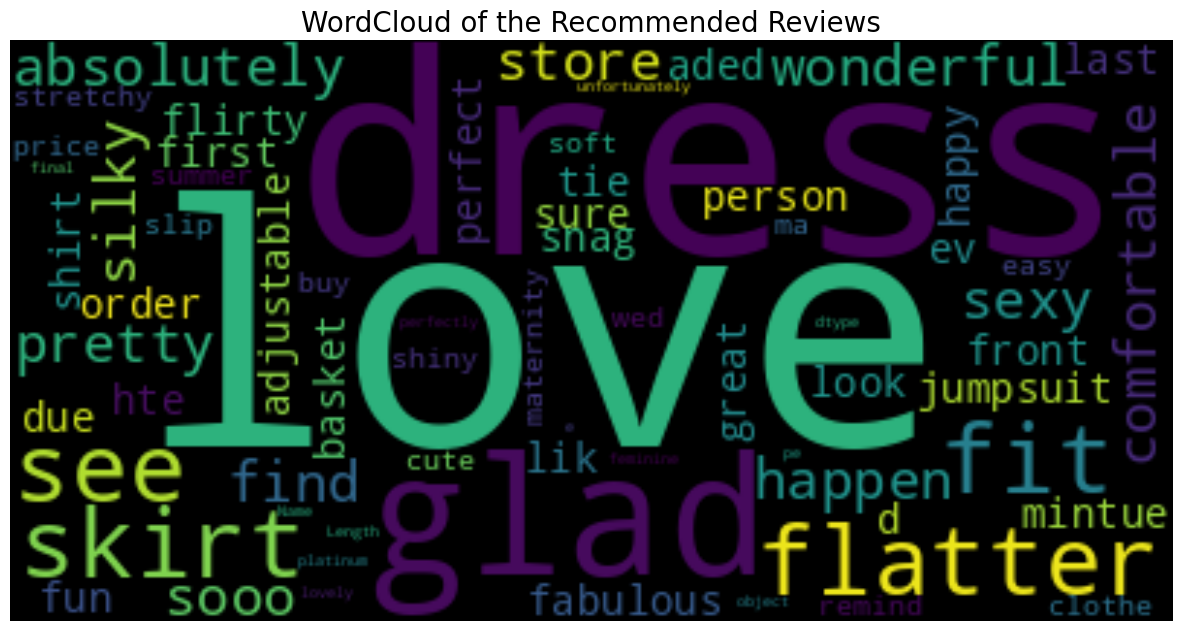

In [ ]:

data_recommended = df[df['Recommended IND'] == 1]  # dataframe that only includes recommended reviews
data_not_recommended = df[df['Recommended IND'] == 0]  # # dataframe that only includes not recommended reviews

WordCloud_recommended = WordCloud(max_words=500,
                                  random_state=30,
                                  collocations=True).generate(str((data_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_recommended, interpolation='bilinear')
plt.title('WordCloud of the Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

## WordCloud of the Not Recommended Reviews

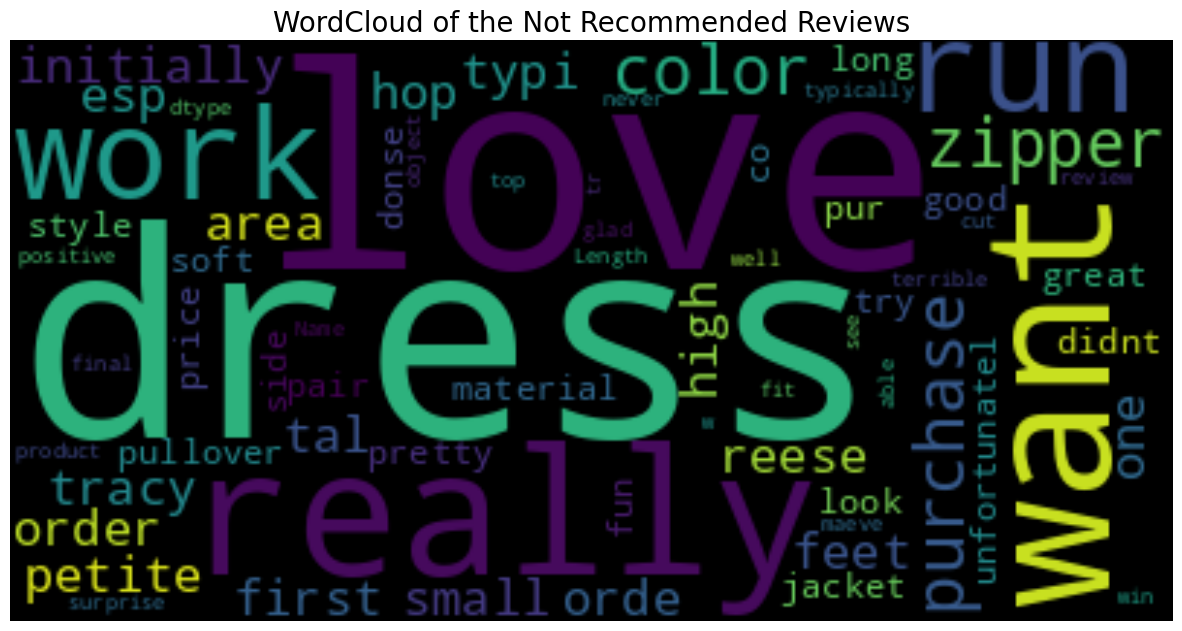

In [ ]:
WordCloud_not_recommended = WordCloud(max_words=500,
                                      random_state=30,
                                      collocations=True).generate(str((data_not_recommended['final'])))

plt.figure(figsize=(15, 8))
plt.imshow(WordCloud_not_recommended, interpolation='bilinear')
plt.title('WordCloud of the Not Recommended Reviews', fontsize=20)
plt.axis("off")
plt.show()

## Model Training

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

In [ ]:
# Initialize the tokenizer and model with a well-supported sentiment analysis model
model_name = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
# Create a 'label' column based on 'Recommended IND' for comparison
df['label'] = df['Recommended IND'].apply(lambda x: 'POSITIVE' if x == 1 else 'NEGATIVE')

# Select a few sample reviews to test the model on
sample_reviews = df[['final', 'label']].sample(5, random_state=42)

# Make predictions for the sample reviews
print("Sample Predictions:")
# Define a function to predict sentiment using the loaded model
def predict_sentiment_explicit(review, model, tokenizer, device, label_map):
    # Tokenize the cleaned review
    inputs = tokenizer(review, return_tensors='pt', truncation=True, padding=True).to(device)

    # Make a prediction
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        prediction = torch.argmax(logits, dim=1).item()

    # Map the predicted label to a human-readable format
    # This model outputs 0 for negative and 1 for positive
    predicted_label = label_map.get(prediction, 'unknown')
    return predicted_label


# Define the label map based on the output of 'distilbert-base-uncased-finetuned-sst-2-english'
label_map = {0: 'NEGATIVE', 1: 'POSITIVE'}

# Determine the device to use
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device) # Move the model to the selected device


for index, row in sample_reviews.iterrows():
    # Use the cleaned review text for prediction
    review_text = row['final']
    true_label = row['label']

    # Get prediction using the explicit model loading
    predicted_label = predict_sentiment_explicit(review_text, model, tokenizer, device, label_map)

    print(f"\nReview: '{review_text}'")
    print(f"True Label: {true_label}")
    print(f"Predicted Label: {predicted_label}")

Sample Predictions:

Review: 'love love dress except armpits make armpits normal round shape normal openings dress would perfection audrey hepburn say really wish would redo dress normal arm openings think would sell like crazy'
True Label: POSITIVE
Predicted Label: NEGATIVE

Review: 'want sweater work sadly fail first pink way sheer like sheerness cause weird color overlap stomach area band bottom tight cause weird balloon affect shirt underneath could work take away beauty knit soft pink gorgeous not good medium light skin folks'
True Label: NEGATIVE
Predicted Label: NEGATIVE

Review: 'love tee super soft love look like sack shape wait get color tall plus long torso still long enough definitely win'
True Label: POSITIVE
Predicted Label: POSITIVE

Review: 'love style swimsuit model purchase realize support wire pad line chest rest swimsuit great not like look chest provide support end return'
True Label: POSITIVE
Predicted Label: POSITIVE

Review: 'super excite try size normal waist s

### Evaluation Metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Get a list of cleaned text
all_reviews = df['final'].tolist()
# Get a list of true labels
true_labels = df['label'].tolist()

In [ ]:
# Get all predictions from the model
all_predictions = []
for review_text in all_reviews:
    predicted_label = predict_sentiment_explicit(review_text, model, tokenizer, device, label_map)
    all_predictions.append(predicted_label)

In [ ]:
# Generate and print the classification report
print("Classification Report:")
print(classification_report(true_labels, all_predictions))

Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.36      0.79      0.49      4101
    POSITIVE       0.94      0.69      0.79     18527

    accuracy                           0.71     22628
   macro avg       0.65      0.74      0.64     22628
weighted avg       0.83      0.71      0.74     22628



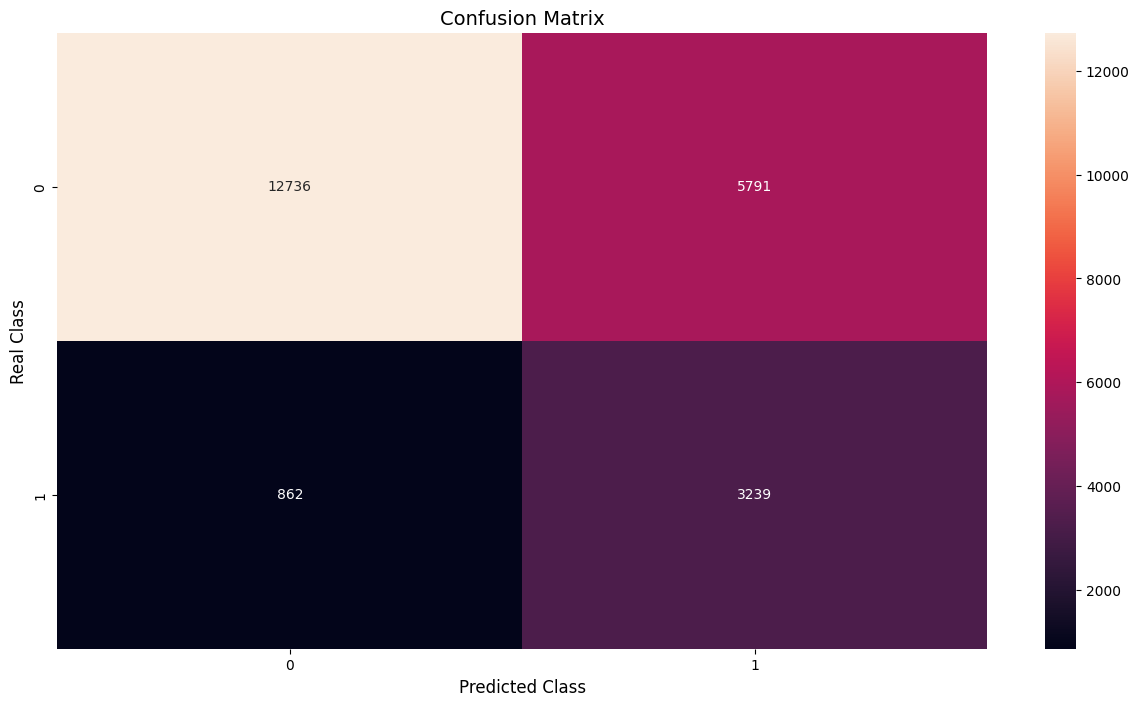

In [ ]:
# Generate and print the confusion matrix
cm = confusion_matrix(true_labels, all_predictions, labels=['POSITIVE', 'NEGATIVE'])
plt.figure(figsize=(15, 8))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix', fontsize=14)
plt.ylabel('Real Class', fontsize=12)
plt.xlabel('Predicted Class', fontsize=12)
plt.show()

Test Output

In [ ]:
review_text = "cheap material that falls apart in seconds. Clothes look nothing like the pictures. I bought the chunky heeled shoes they broke after two times of wearing them."
predicted_label = predict_sentiment_explicit(review_text, model, tokenizer, device, label_map)
print(f"\nReview: '{review_text}'")
print(f"Predicted Label: {predicted_label}")


Review: 'cheap material that falls apart in seconds. Clothes look nothing like the pictures. I bought the chunky heeled shoes they broke after two times of wearing them.'
Predicted Label: NEGATIVE


In [ ]:
review_text = "As usual the clothes I ordered arrived quickly and were all a good fit, except for yoga pants , had to cit 4 ins off them but they are lovely pants. I shall wait for my next pay day!!"
predicted_label = predict_sentiment_explicit(review_text, model, tokenizer, device, label_map)
print(f"\nReview: '{review_text}'")
print(f"Predicted Label: {predicted_label}")


Review: 'As usual the clothes I ordered arrived quickly and were all a good fit, except for yoga pants , had to cit 4 ins off them but they are lovely pants. I shall wait for my next pay day!!'
Predicted Label: POSITIVE


In [ ]:
review_text = "I have no complaints whatsoever, from ordering to getting my goods were excellent , down to the garments themselves, was as good as you see them on the website, I have shopped on here a few times and not disappointed at all, the only problem I have is that some trousers are a bit slim on leg and because I am a below knee amputee I have difficulty getting the right fit, otherwise very happy indeed."
predicted_label = predict_sentiment_explicit(review_text, model, tokenizer, device, label_map)
print(f"\nReview: '{review_text}'")
print(f"Predicted Label: {predicted_label}")


Review: 'I have no complaints whatsoever, from ordering to getting my goods were excellent , down to the garments themselves, was as good as you see them on the website, I have shopped on here a few times and not disappointed at all, the only problem I have is that some trousers are a bit slim on leg and because I am a below knee amputee I have difficulty getting the right fit, otherwise very happy indeed.'
Predicted Label: POSITIVE


In [ ]:
review_text = "I should've checked reviews before ordering... each item they sent was much worse quality in person than how it appeared online, and one of the dresses looked NOTHING in person what they said it was! I even double-checked to make sure they didn't accidentally send me the wrong item. see photos below."
predicted_label = predict_sentiment_explicit(review_text, model, tokenizer, device, label_map)
print(f"\nReview: '{review_text}'")
print(f"Predicted Label: {predicted_label}")


Review: 'I should've checked reviews before ordering... each item they sent was much worse quality in person than how it appeared online, and one of the dresses looked NOTHING in person what they said it was! I even double-checked to make sure they didn't accidentally send me the wrong item. see photos below.'
Predicted Label: NEGATIVE
